In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


# 1. Import data and perform descriptive statistics

## 1.1 Reading 'day_return' dataset 

In [2]:
# 从Excel文件中读取数据
day_return = pd.read_excel('day_return.xlsx')

# 将'Date'列的值作为行索引，删除'Date'列
day_return.index = day_return.Date
day_return.drop('Date',axis = 1,inplace = True)

# 然后删除包含缺失值的行
day_return.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
day_return.dropna(inplace=True)
# 最后得到 day_returnDataFrame 不包含缺失值 的数据集

# 展示数据集
day_return

,TM.CFE,HC0.SHF,RB0.SHF,RU0.SHF,scm.INE,USDCNY.IB
Date,,,,,,
2015-01-08,0,-0.8953,-0.2707,-1.7857,0.0000,-0.040212
2015-01-09,0,-1.8698,-0.8915,0.1890,0.0000,-0.038641
2015-01-12,0,-3.5739,-2.4181,0.6821,0.0000,0.127508
2015-01-13,0,-2.0057,-1.0248,-3.1484,0.0000,-0.083824
2015-01-14,0,-2.4836,-0.6392,-4.7528,0.0000,0.011299
...,...,...,...,...,...,...
2023-10-26,0,0.0527,0.5731,0.1371,0.3604,-0.016400
2023-10-27,1,1.5588,1.4714,-1.1620,0.4347,0.094400
2023-10-30,1,1.0747,1.2453,-2.1357,0.5273,-0.049200


<AxesSubplot:xlabel='Date'>

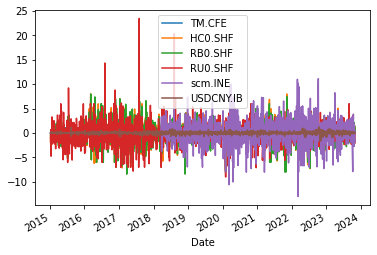

In [3]:
# 画图
day_return.plot()

In [4]:
# 计算皮尔逊相关系数
day_return.corr()

,TM.CFE,HC0.SHF,RB0.SHF,RU0.SHF,scm.INE,USDCNY.IB
TM.CFE,1.000000,-0.114784,-0.132238,-0.100530,-0.044555,0.036721
HC0.SHF,-0.114784,1.000000,0.917205,0.357394,0.113968,-0.062571
RB0.SHF,-0.132238,0.917205,1.000000,0.367942,0.117104,-0.059721
RU0.SHF,-0.100530,0.357394,0.367942,1.000000,0.171872,-0.048038
scm.INE,-0.044555,0.113968,0.117104,0.171872,1.000000,-0.002463
USDCNY.IB,0.036721,-0.062571,-0.059721,-0.048038,-0.002463,1.000000


## 1.2 Splitting the dataset for training and testing

In [5]:
# 导入 train_test_split 函数，该函数用于将数据集分割为训练集和测试集
from sklearn.model_selection import train_test_split

# 从 day_return 数据框中选择所有行的第一列，也就是我们的预测的变量y（TM.CFE） 
y =day_return.values[:,0]

# 从 day_return 数据框中选择所有行的第二列及其之后的列，将其作为解释变量，也就是特征矩阵（X）
X= day_return.values[:,1:]

# 使用 train_test_split 函数将特征矩阵（X）和目标变量（y）分割成训练集和测试集
# test_size=0.3 表示将数据集的30%分配给测试集。
# random_state=4 是一个种子值，确保每次运行代码时得到的划分是相同的，以便结果可重现
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=4)

# 保证我们的预测变量编码为整数
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# 展示 训练集中的预测的变量y（TM.CFE） 
y_train

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

# 2. 使用不同的模型（支持向量机SVM、 Logistic回归、K近邻 k-Nearest Neighbors、随机森林 Random Forest 和决策树 DecisionTree）进行训练和预测

## 2.1. SVM

In [6]:
# 导入SVM Classifier，创建一个SVC对象，其中参数C是正则化参数，kernel是核函数
from sklearn import svm
svm_model = svm.SVC(C=1.0,kernel='rbf')

# 使用训练集 (x_train, y_train) 对模型进行训练
svm_model.fit(x_train, y_train)

# 使用训练好的模型对测试集 (x_test) 进行预测，结果存储在 y_pred 中
y_pred = svm_model.predict(x_test)


## 2.2.  Logistic Regression

In [7]:
# 导入 Logistic Classifier，创建一个 LogisticRegression 对象
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

# 使用训练集 (x_train, y_train) 对模型进行训练
lr_model.fit(x_train, y_train)

# 使用训练好的模型对测试集 (x_test) 进行预测，结果存储在 y_pred 中
y_pred = svm_model.predict(x_test)

## 2.3.  k-Nearest Neighbors Classifier

In [8]:
# 导入 k-Nearest Neighbors Classifier，创建一个 KNeighborsClassifier 对象
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

# 使用训练集 (x_train, y_train) 对模型进行训练
knn_model.fit(x_train, y_train)

# 使用训练好的模型对测试集 (x_test) 进行预测，结果存储在 y_pred 中
y_pred = knn_model.predict(x_test)

## 2.4. Random Forest

In [9]:
# 导入Random Forest Classifier，创建一个 RandomForestClassifier 对象，其中 n_estimators 是树的数量
from sklearn.ensemble import RandomForestClassifier
rnn_model = RandomForestClassifier(n_estimators=200)

# 使用训练集 (x_train, y_train) 对模型进行训练
rnn_model.fit(x_train, y_train)

# 使用训练好的模型对测试集 (x_test) 进行预测，结果存储在 y_pred 中
y_pred = rnn_model.predict(x_test)

## 2.5. DecisionTree Classifier

In [10]:
# 导入 Decision Tree Classifier，创建一个 DecisionTreeClassifier 对象，其中 random_state 是用于控制随机性的种子值
from sklearn.tree import DecisionTreeClassifier

# 使用训练集 (x_train, y_train) 对模型进行训练
dt_model = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)

# 使用训练好的模型对测试集 (x_test) 进行预测，结果存储在 y_pred 中
y_pred = dt_model.predict(x_test)

# 3. Comparing Actual and Predicted Value

In [11]:
models = [svm_model, lr_model, knn_model,  rnn_model,  dt_model]
model_names = ["SVM", "LogisticRegression", "k-Nearest Neighbors Classifier",  "Random Forest", "DecisionTreeClassifier"]
for model,model_name in zip(models,model_names):
    df = pd.DataFrame({'Actual': y_test, 'Predicted': model.predict(x_test)})  
    print(f"{model_name}\n{df.head()}\n")

SVM
   Actual  Predicted
0     0.0          1
1     0.0          0
2     1.0          0
3     1.0          0
4     0.0          1

LogisticRegression
   Actual  Predicted
0     0.0          0
1     0.0          0
2     1.0          0
3     1.0          1
4     0.0          1

k-Nearest Neighbors Classifier
   Actual  Predicted
0     0.0          1
1     0.0          0
2     1.0          1
3     1.0          0
4     0.0          1

Random Forest
   Actual  Predicted
0     0.0          0
1     0.0          0
2     1.0          0
3     1.0          0
4     0.0          1

DecisionTreeClassifier
   Actual  Predicted
0     0.0          0
1     0.0          0
2     1.0          1
3     1.0          0
4     0.0          1



# 4. Accuracy Score

## 计算每个模型的预测准确度（Accuracy Score），以评估模型的性能。Accuracy Score 是模型正确预测的样本比例。

In [12]:
from sklearn.metrics import accuracy_score

models = [svm_model, lr_model, knn_model,  rnn_model,  dt_model]
model_names = ["SVM", "LogisticRegression", "k-Nearest Neighbors Classifier",  "Random Forest", "DecisionTreeClassifier"]
for model,model_name in zip(models,model_names):
    score = accuracy_score(y_test, model.predict(x_test))
    print(f"{model_name} Accuracy Score = {round(score,4)}")

SVM Accuracy Score = 0.5186
LogisticRegression Accuracy Score = 0.514
k-Nearest Neighbors Classifier Accuracy Score = 0.5248
Random Forest Accuracy Score = 0.5031
DecisionTreeClassifier Accuracy Score = 0.4767


### 结论：从 Accuracy Score 结果来看，K近邻模型预测性能更好，Accuracy Score = 0.5248

# 5. Confusion Matrix

## 混淆矩阵的行表示实际值，列表示预测值。矩阵的对角线元素表示模型正确分类的样本数量，而非对角线元素表示模型错误分类的样本数量。

In [13]:
from sklearn.metrics import confusion_matrix

models = [svm_model, lr_model, knn_model,  rnn_model,  dt_model]
model_names = ["SVM", "LogisticRegression", "k-Nearest Neighbors Classifier",  "Random Forest", "DecisionTreeClassifier"]
for model,model_name in zip(models,model_names):
    matrix = confusion_matrix(y_test, model.predict(x_test))
    print(f"{model_name} \n**Confusion Matrix**\n{matrix}\n")

SVM 
**Confusion Matrix**
[[122 214]
 [ 96 212]]

LogisticRegression 
**Confusion Matrix**
[[102 234]
 [ 79 229]]

k-Nearest Neighbors Classifier 
**Confusion Matrix**
[[151 185]
 [121 187]]

Random Forest 
**Confusion Matrix**
[[139 197]
 [123 185]]

DecisionTreeClassifier 
**Confusion Matrix**
[[145 191]
 [146 162]]



### 解释结果，以SVM 为例
####                | 预测为0 | 预测为1 |
#### 实际为 0 |    122     |    214     |
#### 实际为 0 |     96      |    212     |
#### TN: 实际为 0 且被正确预测为 0 的数量，为122
#### FP: 实际为 0 但被错误预测为 1 的数量，为214
#### FN: 实际为 1 但被错误预测为 0 的数量，为96
#### TP: 实际为 1 且被正确预测为 1 的数量，为212

# 6. Classification Report

### 其他预测指标比较   
### 精确度（Precision）： 正确预测的正类别样本数占所有预测为正类别的样本数的比例
### 召回率（Recall）： 正确预测的正类别样本数占所有实际为正类别的样本数的比例
### F1分数（F1-Score）： 精确度和召回率的平均值
### Support： 每个类别的实际出现次数

### Macro Avg： 对所有类别的指标取算术平均值
### Weighted Avg： 对所有类别的指标进行加权平均

In [14]:
from sklearn.metrics import classification_report

models = [svm_model, lr_model, knn_model,  rnn_model,  dt_model]
model_names = ["SVM", "LogisticRegression", "k-Nearest Neighbors Classifier",  "Random Forest", "DecisionTreeClassifier"]
for model,model_name in zip(models,model_names):
    c_report = classification_report(y_test, model.predict(x_test))
    print(f"{model_name} \nclassification_report\n{c_report}\n")

SVM 
classification_report
              precision    recall  f1-score   support

         0.0       0.56      0.36      0.44       336
         1.0       0.50      0.69      0.58       308

    accuracy                           0.52       644
   macro avg       0.53      0.53      0.51       644
weighted avg       0.53      0.52      0.51       644


LogisticRegression 
classification_report
              precision    recall  f1-score   support

         0.0       0.56      0.30      0.39       336
         1.0       0.49      0.74      0.59       308

    accuracy                           0.51       644
   macro avg       0.53      0.52      0.49       644
weighted avg       0.53      0.51      0.49       644


k-Nearest Neighbors Classifier 
classification_report
              precision    recall  f1-score   support

         0.0       0.56      0.45      0.50       336
         1.0       0.50      0.61      0.55       308

    accuracy                           0.52       644
   

#### 精确度（Precision）的 Macro Avg 结果表明，SVM，LogisticRegression，k-Nearest Neighbors Classifier   预测性能更好  precision = 0.53
#### 精确度（Precision）的 Weighted Avg 结果表明，SVM，LogisticRegression   预测性能更好  precision = 0.53

#### 召回率（Recall）的 Macro Avg 结果表明，SVM，k-Nearest Neighbors Classifier   预测性能更好  Recall = 0.53
#### 召回率（Recall）的 Weighted Avg 结果表明，k-Nearest Neighbors Classifier   预测性能更好  Recall = 0.61

#### F1-Score 的 Macro Avg  结果表明，k-Nearest Neighbors Classifier   预测性能更好   F1-Score = 0.51
#### F1-Score 的 Weighted Avg 结果表明，LogisticRegression   预测性能更好  F1-Score = 0.59


# 7. ROC curve

### ROC 曲线上的点表示不同阈值下的 True Positive Rate 与 True Negative Rate，曲线下面积（AUC）越大，模型性能越好

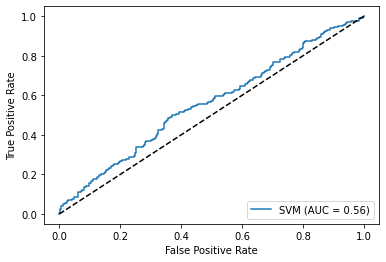

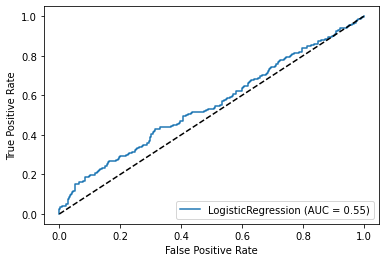

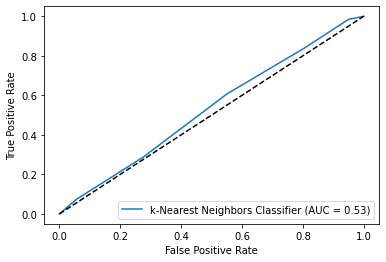

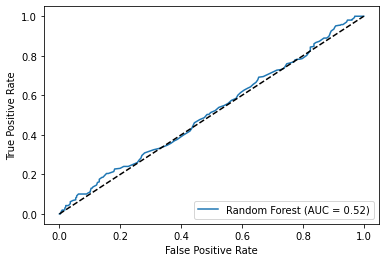

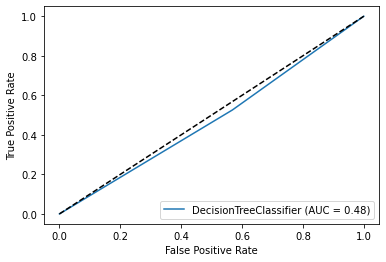

In [17]:
from sklearn.metrics import plot_roc_curve
models = [svm_model, lr_model, knn_model,  rnn_model,  dt_model]
model_names = ["SVM", "LogisticRegression", "k-Nearest Neighbors Classifier",  "Random Forest", "DecisionTreeClassifier"]
for model,model_name in zip(models,model_names):
    plot_roc_curve(model, x_test, y_test,name=model_name)
    x = np.linspace(0,1,100)
    plt.plot(x,x,'k--')
   

#### ROC 曲线 表明 SVM  预测性能更好，曲线下面积（AUC）最大，模型性能最好，AUC = 0.56